In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv('features_data.csv', delimiter=',', decimal='.')
person_name = data['person_name']
data.set_index("person_name", inplace=True)
featuresData = data.to_xarray()
featuresData

<xarray.Dataset>
Dimensions:               (person_name: 16)
Coordinates:
  * person_name           (person_name) object 'p1' 'p2' 'p3' ... 'p15' 'p16'
Data variables: (12/37)
    grasping_exploratory  (person_name) int64 2 7 2 1 1 2 5 2 4 4 0 1 1 2 2 3
    grasping_performance  (person_name) int64 21 21 21 19 20 ... 19 19 21 20 19
    grasping_double       (person_name) int64 2 3 2 2 3 2 3 2 1 1 2 1 2 2 2 1
    gender                (person_name) int64 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1
    time_1                (person_name) float64 20.2 22.88 25.23 ... 18.36 17.77
    time_2                (person_name) float64 17.88 27.16 28.3 ... 18.18 16.48
    ...                    ...
    time                  (person_name) float64 61.08 78.28 83.12 ... 60.0 59.01
    height                (person_name) int64 173 171 168 176 ... 163 176 169
    level                 (person_name) int64 13 13 13 17 19 ... 13 15 13 13 17
    experience            (person_name) float64 12.0 4.0 5.0 ... 5.0 10.0 17.0
    training              (person_name) float64 1.0 1.5 1.5 1.5 ... 1.0 2.5 1.5
    age                   (person_name) int64 28 26 26 27 24 ... 34 29 26 33 34

In [32]:
def plotFeatures(feature_x, feature_y, label_x, label_y, location='best'):
    plt.figure(figsize=(6, 6))
    for i, person in enumerate(person_name):
        features = featuresData.sel(person_name=person)
        x = features[feature_x]
        y = features[feature_y]
        gender = features['gender']

        color = 'salmon' if gender == 0 else 'darkturquoise'
        marker = 'x' if gender == 0 else '+'
        size = 40 if gender == 0 else 80
        label = 'Female' if gender == 0 else 'Male'
        if i < 2:
            plt.scatter(x, y, color=color, marker=marker, s=size, label=label)
        else:
            plt.scatter(x, y, color=color, marker=marker, s=size)

    ticks = [17, 18, 19, 20, 21]
    if(feature_x  == 'grasping_performance'):       
        plt.xticks(ticks)
    elif(feature_y == 'grasping_performance'):
        plt.yticks(ticks)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(loc=location)
    plt.savefig('Correlation_Plots/eps/' + feature_x + '_' + feature_y + '.eps')
    plt.savefig('../MasterThesis/figures/correlations/' + feature_x + '_' + feature_y + '.eps')
    plt.savefig('Correlation_Plots/png/' + feature_x + '_' + feature_y + '.png')    


In [33]:
def plotBars(barFeature, label_x, label_y, path):
    plt.figure(figsize=(6,6))
    
    for i, person in enumerate(person_name):
        features = featuresData.sel(person_name=person)
        feature = features[barFeature].values
        gender = features['gender']
        color = 'salmon' if gender == 0 else 'darkturquoise'

        plt.bar(person, feature, color=color)
        plt.tick_params(axis='x', rotation=45)
        plt.xlabel(label_x)
        plt.ylabel(label_y)

    plt.savefig(f'Plots/{path}.eps')
    plt.savefig(f'../MasterThesis/figures/{path}.eps')
    plt.show()

# Plot Bars

<BarContainer object of 3 artists>

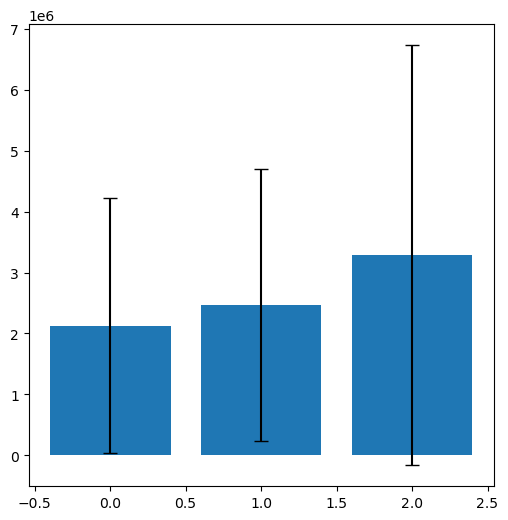

In [34]:
mean_section_1 = np.mean(featuresData['mean_jerk_1_vector'].values)
mean_section_2 = np.mean(featuresData['mean_jerk_2_vector'].values)
mean_section_3 = np.mean(featuresData['mean_jerk_3_vector'].values)
mean_values = [mean_section_1, mean_section_2, mean_section_3]

std_section_1 = np.std(featuresData['mean_jerk_1_vector'].values)
std_section_2 = np.std(featuresData['mean_jerk_2_vector'].values)
std_section_3 = np.std(featuresData['mean_jerk_3_vector'].values)
std_values = [std_section_1, std_section_2, std_section_3]

plt.figure(figsize=(6, 6))
plt.bar(np.arange(3), mean_values, yerr=std_values, capsize=5)

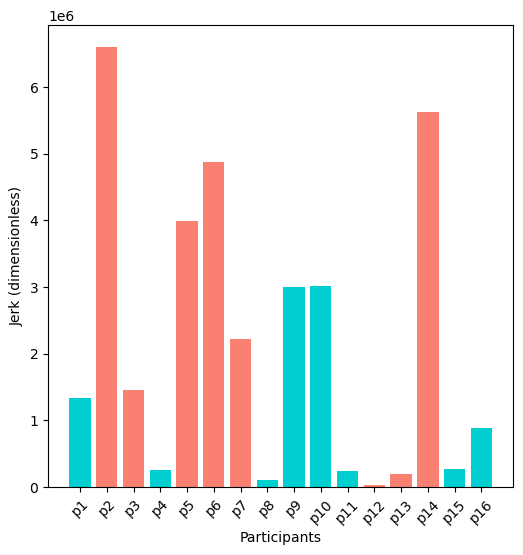

In [35]:
plotBars('mean_jerk_1_vector', 'Participants', 'Jerk (dimensionless)', 'jerk1')

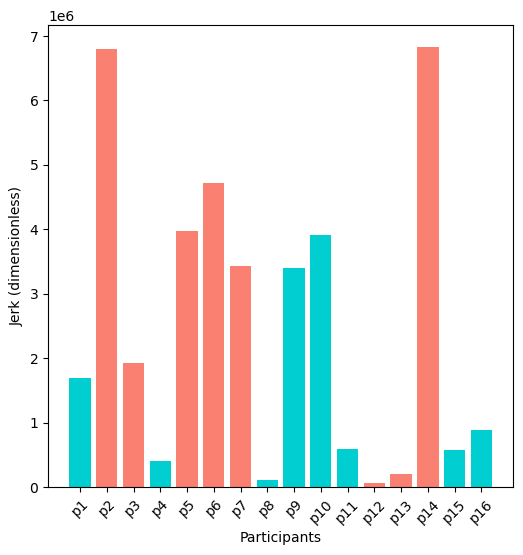

In [36]:
plotBars('mean_jerk_2_vector', 'Participants', 'Jerk (dimensionless)', 'jerk2')

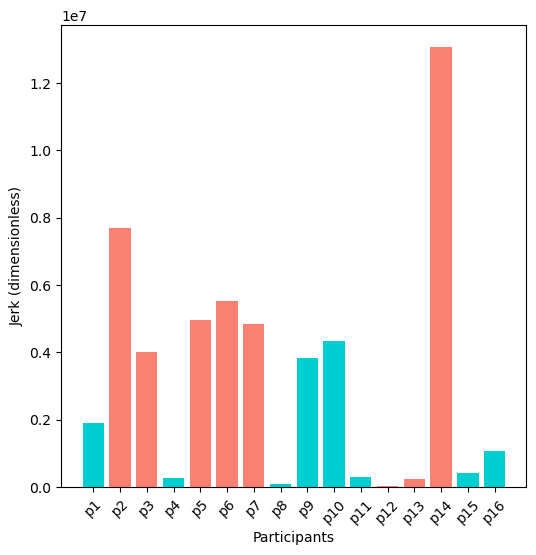

In [37]:
plotBars('mean_jerk_3_vector', 'Participants', 'Jerk (dimensionless)', 'jerk3')

# Plot Correlation
## Jerk

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


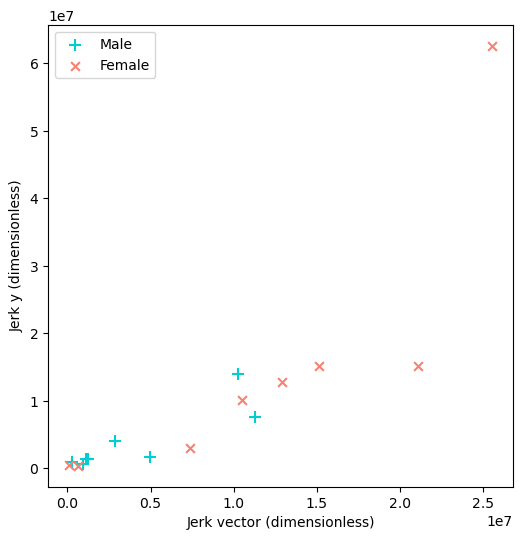

In [38]:
plotFeatures('mean_jerk_vector', 'mean_jerk_y', 'Jerk vector (dimensionless)', 'Jerk y (dimensionless)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


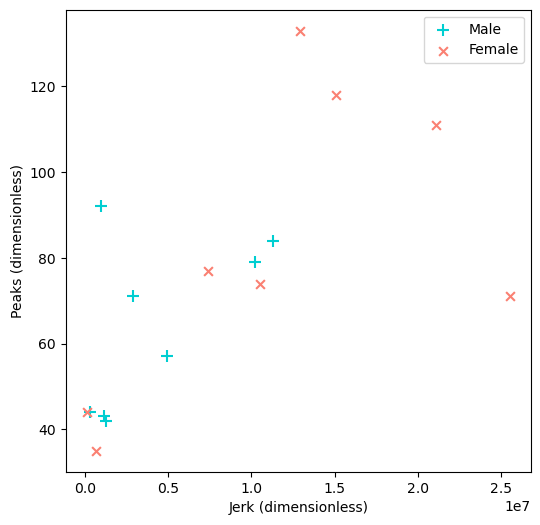

In [39]:
plotFeatures('mean_jerk_vector', 'pos_peaks', 'Jerk (dimensionless)', 'Peaks (dimensionless)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


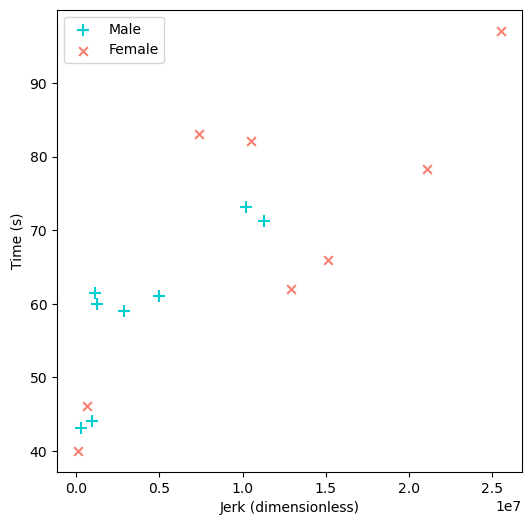

In [40]:
plotFeatures('mean_jerk_vector', 'time', 'Jerk (dimensionless)', 'Time (s)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


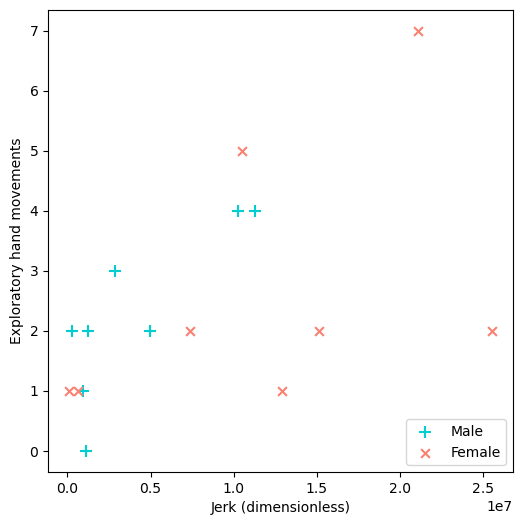

In [41]:
plotFeatures('mean_jerk_vector', 'grasping_exploratory', 'Jerk (dimensionless)', 'Exploratory hand movements', 'lower right')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


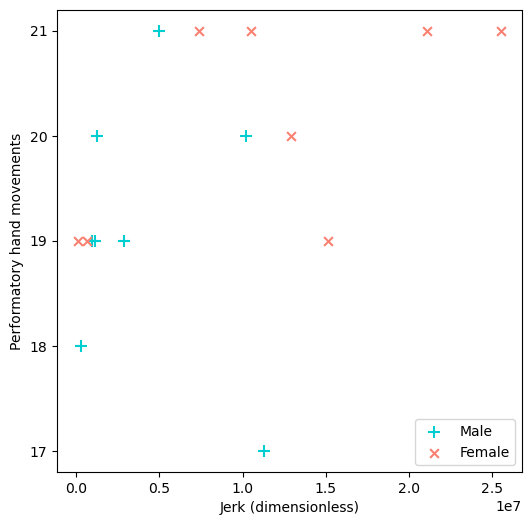

In [42]:
plotFeatures('mean_jerk_vector', 'grasping_performance', 'Jerk (dimensionless)', 'Performatory hand movements', 'lower right')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


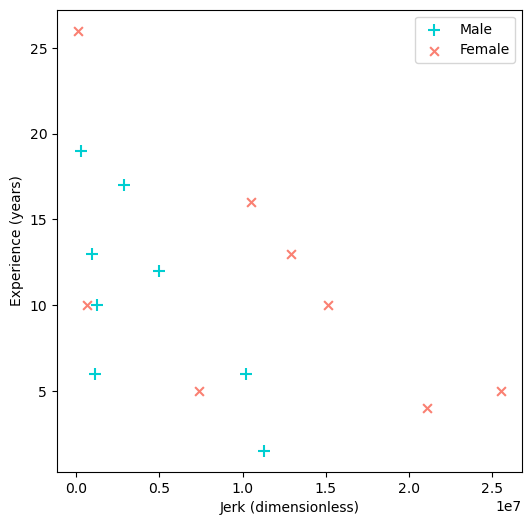

In [43]:
plotFeatures('mean_jerk_vector', 'experience', 'Jerk (dimensionless)', 'Experience (years)')

## Time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


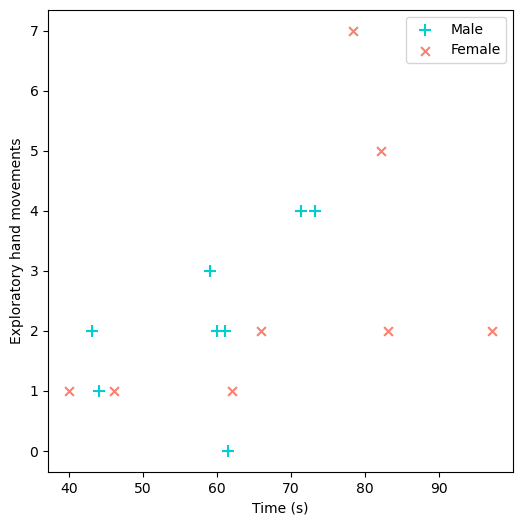

In [44]:
plotFeatures('time', 'grasping_exploratory', 'Time (s)', 'Exploratory hand movements')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


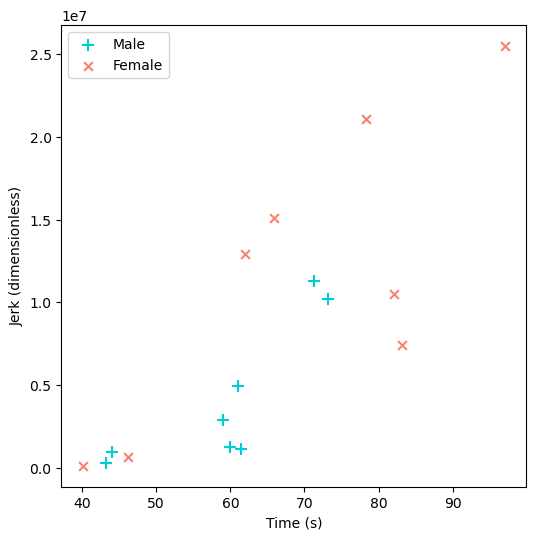

In [45]:
plotFeatures('time', 'mean_jerk_vector', 'Time (s)', 'Jerk (dimensionless)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


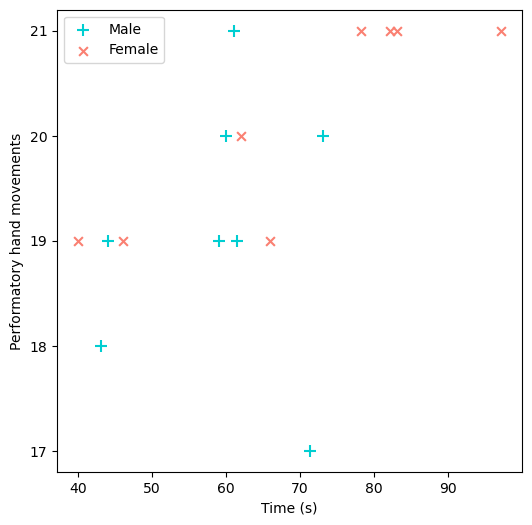

In [46]:
plotFeatures('time', 'grasping_performance', 'Time (s)', 'Performatory hand movements')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


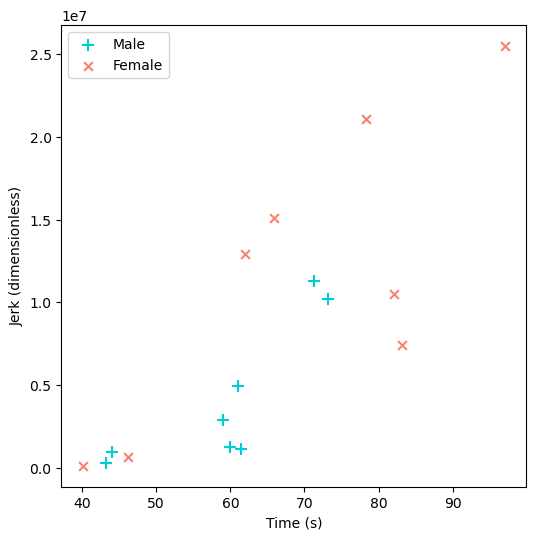

In [47]:
plotFeatures('time', 'mean_jerk_vector', 'Time (s)', 'Jerk (dimensionless)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


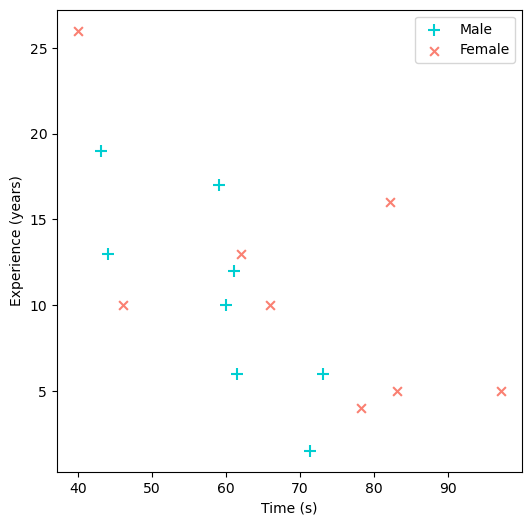

In [48]:
plotFeatures('time', 'experience', 'Time (s)', 'Experience (years)')

## Grasping

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


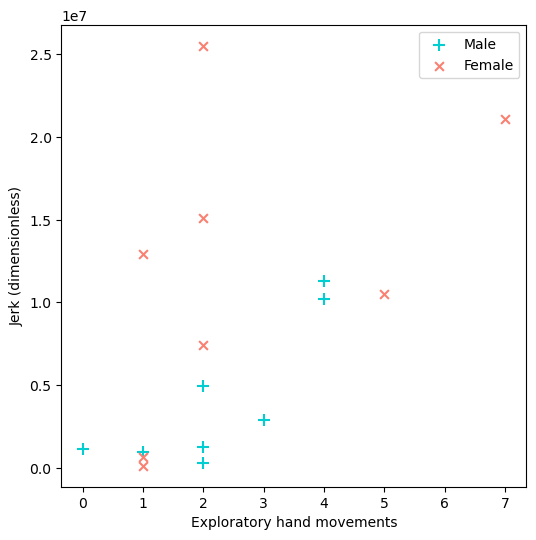

In [49]:
plotFeatures('grasping_exploratory', 'mean_jerk_vector', 'Exploratory hand movements', 'Jerk (dimensionless)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


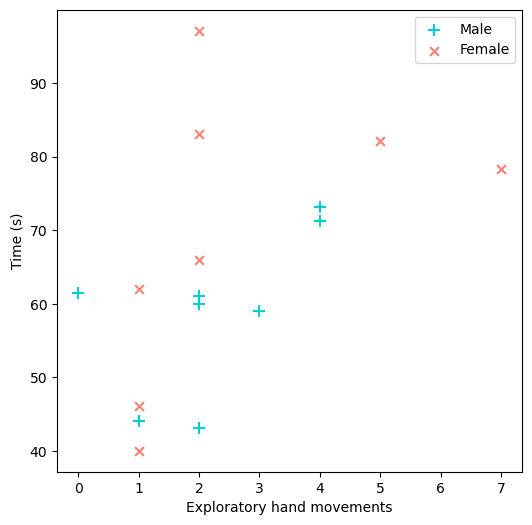

In [50]:
plotFeatures('grasping_exploratory', 'time', 'Exploratory hand movements', 'Time (s)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


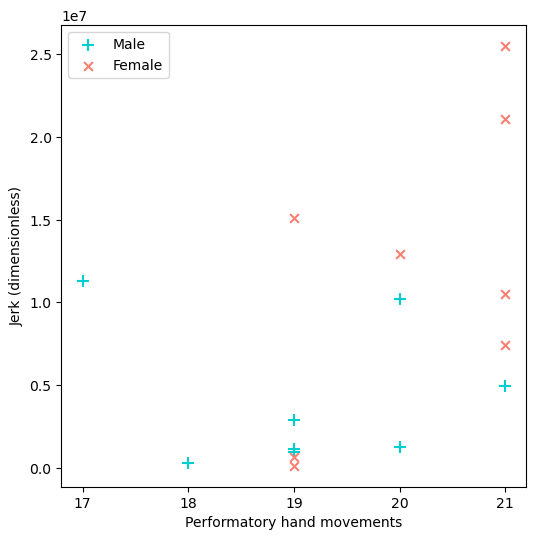

In [51]:
plotFeatures('grasping_performance', 'mean_jerk_vector', 'Performatory hand movements', 'Jerk (dimensionless)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


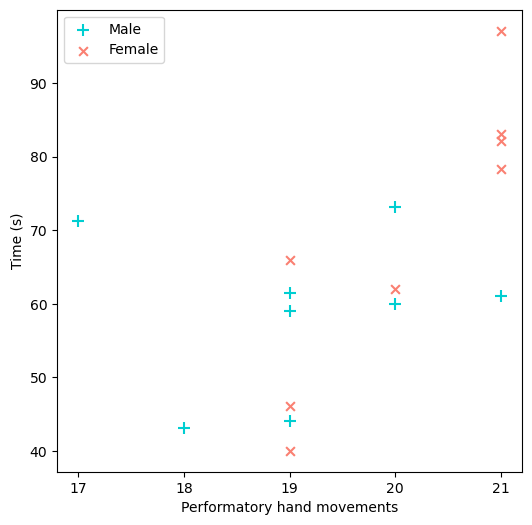

In [52]:
plotFeatures('grasping_performance', 'time', 'Performatory hand movements', 'Time (s)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


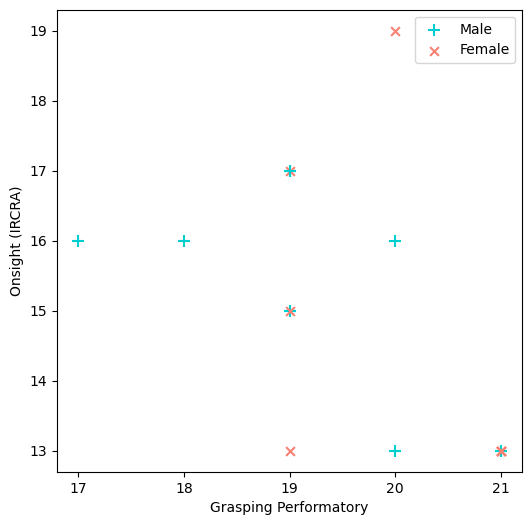

In [53]:
plotFeatures('grasping_performance', 'level', 'Grasping Performatory', 'Onsight (IRCRA)')

## Level

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


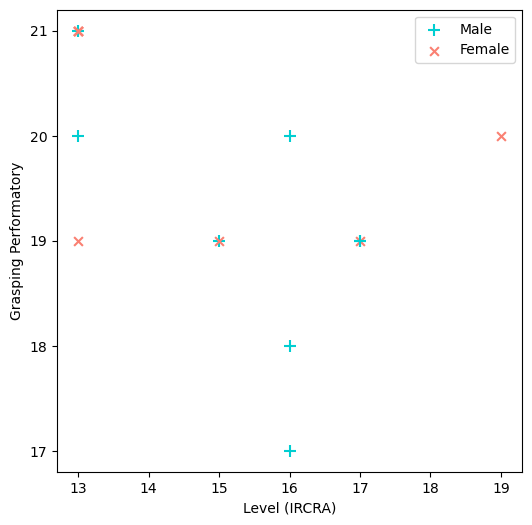

In [54]:
plotFeatures('level', 'grasping_performance', 'Level (IRCRA)', 'Grasping Performatory')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


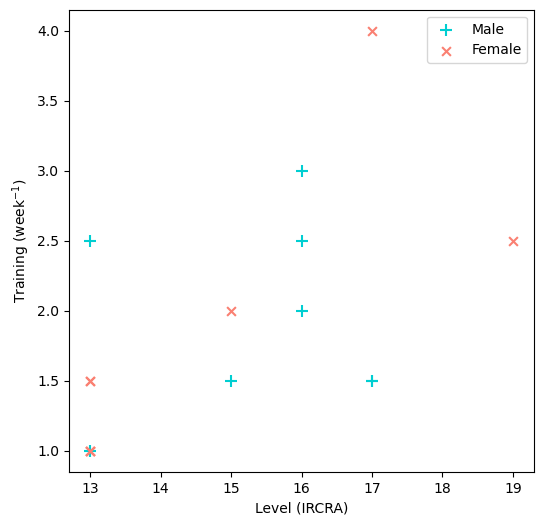

In [55]:
plotFeatures('level', 'training', 'Level (IRCRA)', 'Training (week$^{-1}$)')

## Experience

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


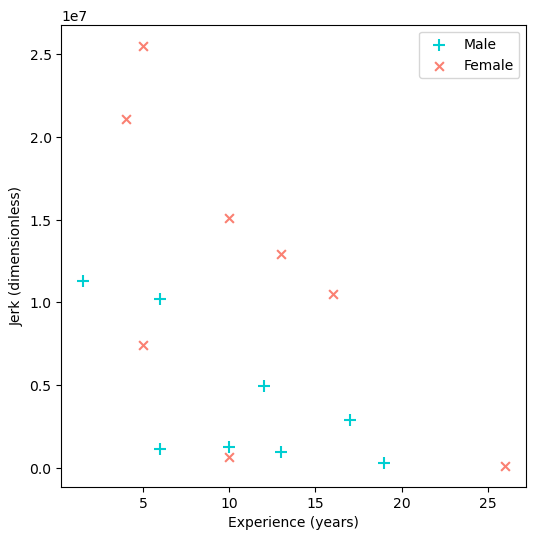

In [56]:
plotFeatures('experience', 'mean_jerk_vector', 'Experience (years)', 'Jerk (dimensionless)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


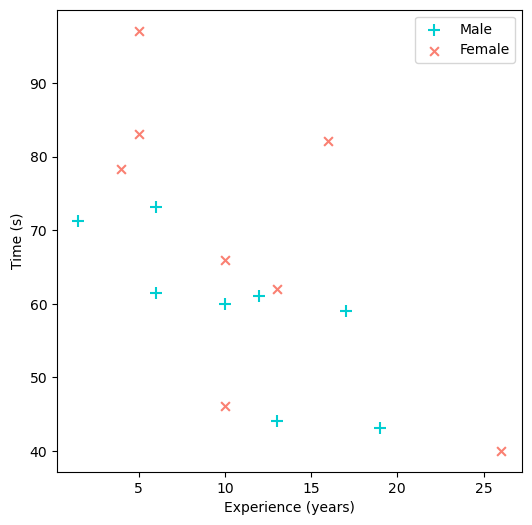

In [57]:
plotFeatures('experience', 'time', 'Experience (years)', 'Time (s)')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


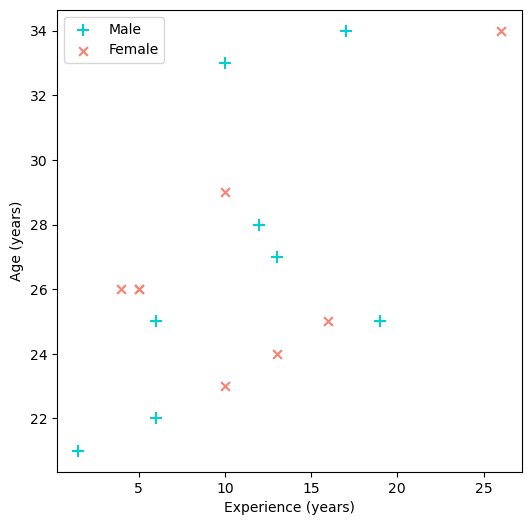

In [58]:
plotFeatures('experience', 'age', 'Experience (years)', 'Age (years)')